Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


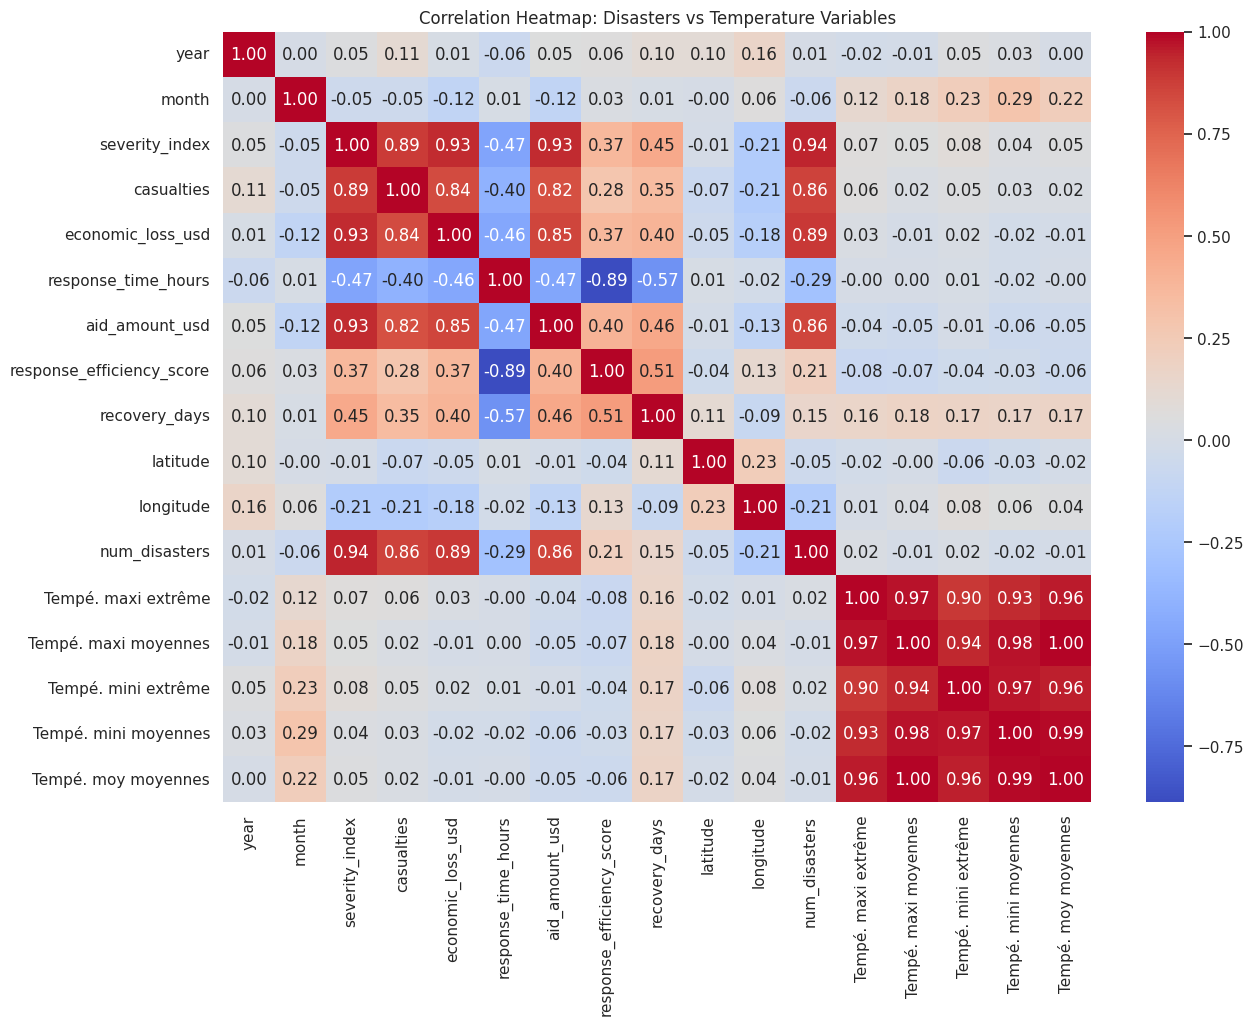

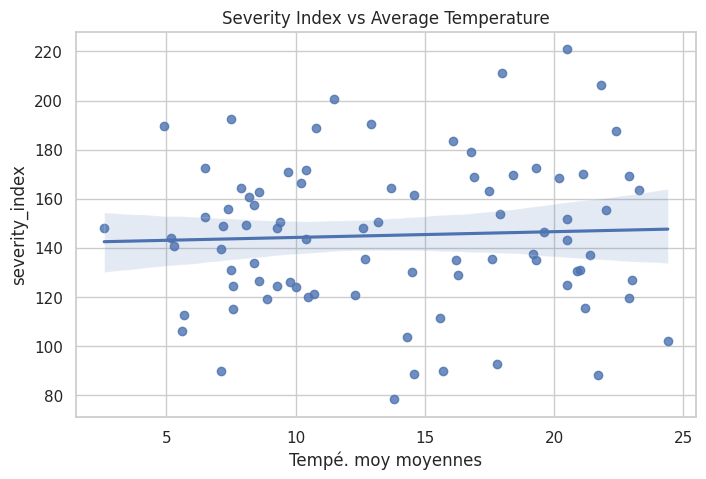

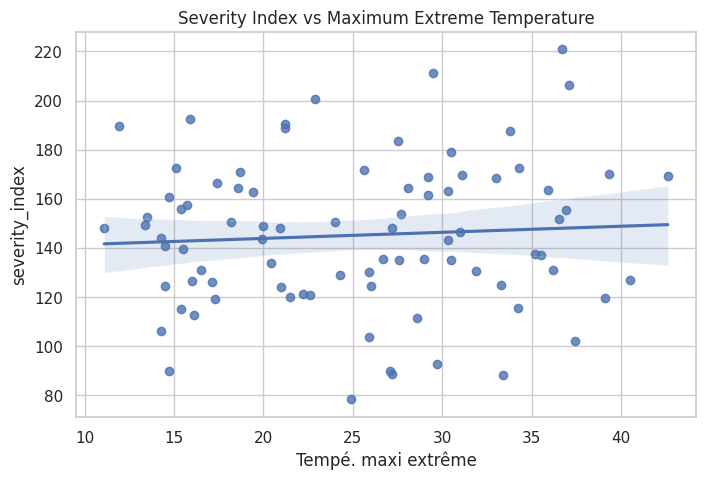

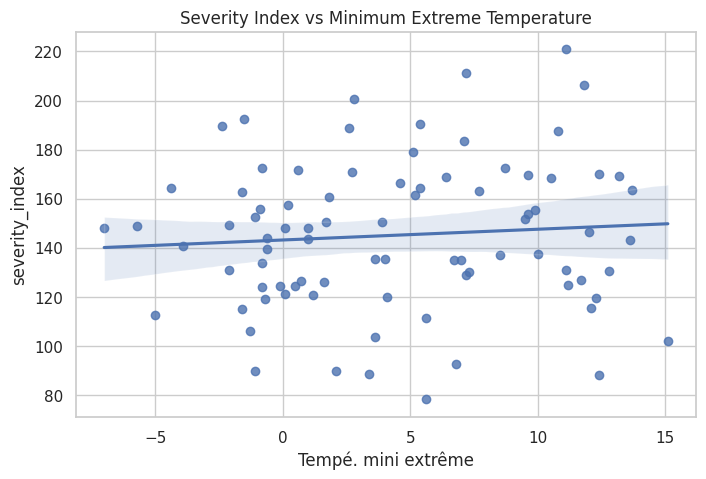

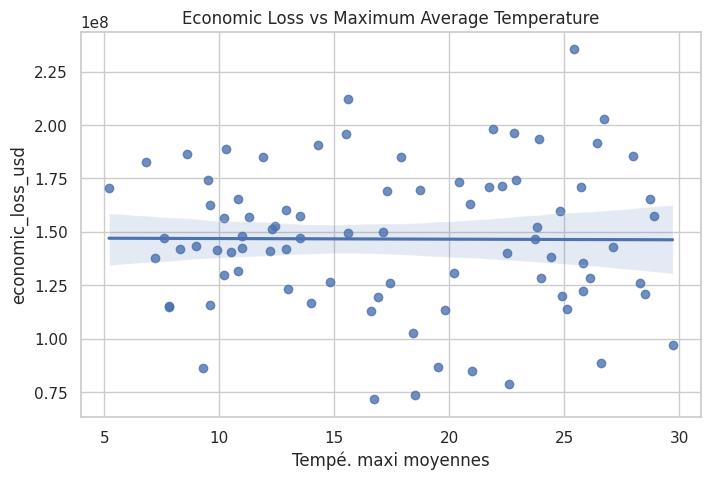

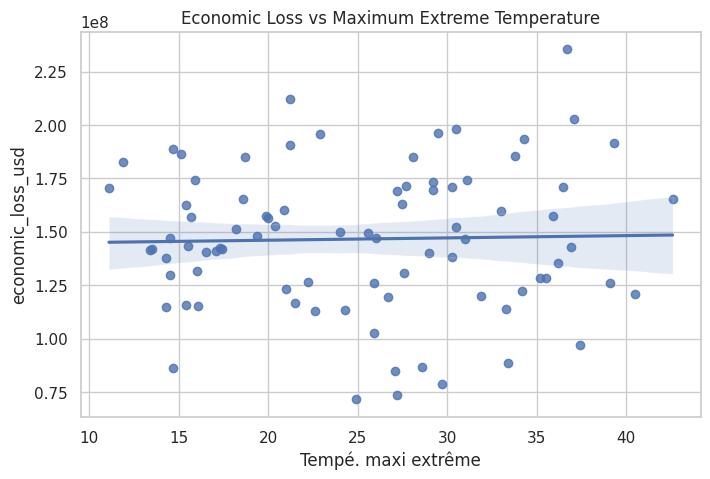

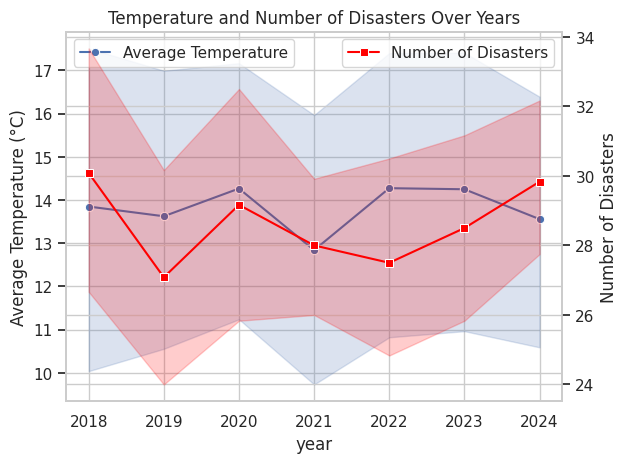

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
path = "/content/drive/MyDrive/merged_table.xlsx"
df = pd.read_excel(path)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float, errors='ignore')

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Disasters vs Temperature Variables")
plt.show()

# Compare severity to average temperature
plt.figure(figsize=(8,5))
sns.regplot(data=df, x="Tempé. moy moyennes", y="severity_index")
plt.title("Severity Index vs Average Temperature")
plt.show()

# Compare severity to maximum temperature
plt.figure(figsize=(8,5))
sns.regplot(
    data=df,
    x="Tempé. maxi extrême",
    y="severity_index"
)
plt.title("Severity Index vs Maximum Extreme Temperature")
plt.show()

# Compare severity to minimum temperature
plt.figure(figsize=(8,5))
sns.regplot(
    data=df,
    x="Tempé. mini extrême",
    y="severity_index"
)
plt.title("Severity Index vs Minimum Extreme Temperature")
plt.show()

# Compare economic loss to temperature
plt.figure(figsize=(8,5))
sns.regplot(data=df, x="Tempé. maxi moyennes", y="economic_loss_usd")
plt.title("Economic Loss vs Maximum Average Temperature")
plt.show()

# Compare economic loss to extreme temperature
plt.figure(figsize=(8,5))
sns.regplot(data=df, x="Tempé. maxi extrême", y="economic_loss_usd")
plt.title("Economic Loss vs Maximum Extreme Temperature")
plt.show()

# temperature and num_disasters evolution over years
ax = sns.lineplot(data=df, x="year", y="Tempé. moy moyennes", marker="o", label="Average Temperature")
ax2 = ax.twinx()
sns.lineplot(data=df, x="year", y="num_disasters", marker="s", color="red", label="Number of Disasters", ax=ax2)
ax.set_title("Temperature and Number of Disasters Over Years")
ax.set_ylabel("Average Temperature (°C)")
ax2.set_ylabel("Number of Disasters")
ax.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()
